In [ ]:
!pip install pandas matplotlib openpyxl

In [ ]:
# Install dependencies if needed (run this first in Colab)
# !pip install pandas matplotlib openpyxl

import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
%matplotlib inline
# For inline plots in Colab

In [7]:
# Embed the full CSV data (from provided document)
csv_data = """
Household_ID,Family_Size,Monthly_Income,Electricity_Usage (kWh),Gas_Usage,Appliances_Count,Month
H001,7,85318,103,105,6,Mar
H002,4,43664,115,79,10,Feb
H003,5,87172,379,158,2,Feb
H004,7,46736,435,54,10,Jun
H005,3,20854,346,168,12,Dec
H006,5,58623,357,82,9,Jan
H007,5,27392,483,167,7,Feb
H008,7,75680,259,114,8,Jun
H009,2,66717,439,195,4,Mar
H010,3,70859,251,60,2,Apr
H011,7,46309,495,134,6,Jan
H012,3,83734,277,75,13,Aug
H013,3,90467,262,112,13,Jul
H014,5,72662,479,135,3,Jul
H015,4,32688,132,108,6,Mar
H016,3,45342,278,76,9,Oct
H017,6,57157,200,147,12,Oct
H018,5,87863,367,154,10,Mar
H019,2,72083,422,148,3,Feb
H020,4,85733,164,178,13,Dec
H021,6,54698,267,198,4,Jan
H022,6,42671,429,104,4,Jul
H023,2,45184,142,55,2,Jul
H024,4,62107,143,144,9,Dec
H025,5,71663,384,182,7,Feb
H026,1,35708,496,151,13,Jul
H027,4,69811,111,52,14,Aug
H028,2,22811,194,72,9,Jan
H029,6,76250,401,102,12,Sep
H030,5,92082,485,132,10,Jul
H031,4,54754,352,194,6,Mar
H032,1,31411,341,134,13,Aug
H033,1,22911,134,127,4,Jul
H034,3,87270,314,159,6,Nov
H035,3,28680,436,50,6,Aug
H036,7,91295,189,100,6,Jun
H037,2,31111,363,53,4,Sep
H038,4,57504,192,162,12,May
H039,4,21802,189,81,11,Mar
H040,7,28155,214,83,5,Mar
H041,6,93656,204,141,10,Jan
H042,6,59384,490,144,14,Dec
H043,7,67254,295,121,11,Aug
H044,6,41918,413,88,10,Feb
H045,3,80713,213,167,3,Mar
H046,4,50306,174,52,9,Aug
H047,7,36646,475,172,9,Aug
H048,4,66843,316,99,8,Nov
H049,1,36371,376,61,9,Apr
H050,3,97371,348,103,4,Apr
H051,5,22049,263,182,14,May
H052,3,51616,493,106,7,Jun
H053,7,40932,456,194,2,May
H054,5,49855,291,161,8,Jul
H055,1,81434,326,96,2,Feb
H056,7,92694,276,200,10,Jul
H057,2,63016,198,134,2,Oct
H058,4,27400,135,191,2,Jul
H059,1,62642,195,115,8,Jan
H060,4,35151,251,124,3,Jul
H061,6,71407,250,152,6,May
H062,2,86690,289,87,9,Mar
H063,2,24499,323,99,9,Mar
H064,1,26295,136,147,4,Apr
H065,2,79040,367,131,8,Dec
H066,5,32183,468,79,4,Feb
H067,2,49299,282,128,7,Feb
H068,4,32874,112,140,7,Jan
H069,4,52711,378,101,4,May
H070,7,25539,316,128,8,Apr
H071,4,73351,454,79,4,Nov
H072,7,81267,460,155,9,Oct
H073,4,68354,385,100,11,Feb
H074,5,22557,372,130,5,Mar
H075,7,58360,468,182,14,Jul
H076,3,22200,161,78,2,Jul
H077,6,88497,183,181,5,Dec
H078,1,66975,467,187,8,Apr
H079,4,41357,316,194,12,May
H080,2,97505,441,123,5,May
H081,4,22869,496,66,14,Jun
H082,2,81135,286,133,7,Sep
H083,6,70108,118,118,10,Feb
H084,6,58467,276,83,2,May
H085,6,43328,199,55,14,Dec
H086,2,23987,495,102,6,Mar
H087,4,78871,332,175,12,Apr
H088,6,42399,175,92,8,Oct
H089,5,66214,364,164,2,Jun
H090,7,90271,383,160,5,Dec
H091,2,64064,305,200,7,Aug
H092,2,90091,322,129,3,Jan
H093,4,60818,483,144,11,Oct
H094,2,65525,151,167,6,Aug
H095,2,39830,438,193,12,Nov
H096,6,37429,466,57,11,Jul
H097,4,26893,243,181,2,Jan
H098,6,99909,472,153,7,Feb
H099,7,67333,168,181,7,Mar
H100,7,23436,198,74,14,Jan
H101,6,94290,495,145,5,Sep
H102,7,96213,124,142,14,Aug
H103,4,25895,478,110,9,Feb
H104,1,39738,152,171,5,Sep
H105,6,50746,250,100,9,Jul
H106,5,69377,243,196,14,Sep
H107,5,68404,156,70,9,Jun
H108,2,74045,138,54,6,Jun
H109,7,59790,208,141,14,Nov
H110,5,25600,280,110,5,Apr
H111,2,60764,141,71,13,Oct
H112,1,94543,285,198,14,Oct
H113,4,65714,497,119,3,Feb
H114,4,76835,322,50,12,Jul
H115,4,93744,221,182,4,May
H116,5,76491,232,61,4,Nov
H117,1,38589,262,139,5,Jun
H118,5,63484,314,95,5,Feb
H119,7,56212,320,83,11,May
H120,5,63525,334,127,12,Oct
H121,1,67202,430,94,12,Apr
H122,1,52635,245,122,6,Sep
H123,7,83208,338,75,5,Jun
H124,1,53828,175,96,12,Feb
H125,1,38711,108,170,11,Jan
H126,4,23420,173,105,9,May
H127,7,20301,500,143,7,Sep
H128,3,65236,352,156,7,Jun
H129,3,86235,329,112,9,Oct
H130,1,74240,106,97,8,Dec
H131,3,85726,273,110,11,Jul
H132,3,30492,240,130,12,May
H133,1,26102,267,75,13,Oct
H134,3,70336,269,85,11,Jun
H135,5,46641,492,50,14,May
H136,2,54584,382,57,9,Nov
H137,7,52745,221,162,3,Sep
H138,2,43093,293,148,10,Jun
H139,1,86105,104,96,2,Nov
H140,4,71885,128,176,9,Aug
H141,7,56631,264,105,13,Feb
H142,1,92991,438,63,12,Dec
H143,4,24014,235,77,13,Sep
H144,2,31093,464,127,13,May
H145,1,38070,420,179,5,Jul
H146,7,55777,441,158,5,Oct
H147,7,76958,244,63,6,Jan
H148,6,30729,426,105,9,Oct
H149,5,65017,316,164,6,May
H150,3,86320,400,56,9,Dec
H151,4,47751,231,52,11,Oct
H152,6,98069,391,160,2,Feb
H153,3,74748,169,200,13,Dec
H154,3,25801,351,156,11,Jun
H155,1,39190,374,67,10,Nov
H156,3,69689,463,87,7,Jan
H157,5,70993,281,164,4,Mar
H158,7,49592,266,64,14,May
H159,6,30647,190,168,9,Apr
H160,3,28716,301,77,10,Mar
H161,1,90316,445,88,7,Oct
H162,5,22368,118,66,12,May
H163,2,97575,138,135,8,Nov
H164,7,26655,225,175,2,Aug
H165,7,90031,272,93,6,Nov
H166,6,96429,240,74,6,Apr
H167,7,75766,341,194,11,Jan
H168,3,33403,319,62,5,Nov
H169,1,52097,225,74,7,Jul
H170,7,98657,157,117,8,Aug
H171,7,30966,247,187,10,Mar
H172,2,72921,416,116,2,Jun
H173,2,69726,482,158,7,Feb
H174,4,70300,460,195,8,Jul
H175,5,42677,100,160,4,Aug
H176,3,75609,486,160,9,Jun
H177,7,76661,447,83,6,Jun
H178,7,51024,289,160,10,May
H179,1,90313,290,57,6,Aug
H180,4,73006,468,162,10,Jan
H181,5,35338,411,132,11,Oct
H182,4,88027,216,91,5,Apr
H183,6,39508,233,150,10,Apr
H184,5,23051,157,55,6,Mar
H185,7,68747,143,75,11,Mar
H186,7,74021,272,113,10,Apr
H187,5,86412,259,108,4,Nov
H188,7,78335,272,158,5,Jan
H189,3,76179,416,170,10,Nov
H190,5,52093,402,82,11,Nov
H191,4,89678,248,199,12,Feb
H192,5,59734,179,70,7,Sep
H193,7,92615,473,119,3,Oct
H194,3,93523,312,161,8,Feb
H195,3,37019,302,53,3,May
H196,6,93847,351,143,12,Sep
H197,4,99634,328,124,3,Sep
H198,2,48251,263,111,12,Aug
H199,2,45945,326,143,2,Jan
H200,5,52217,246,144,12,Jan
H201,6,28308,119,104,12,Sep
H202,1,25949,146,186,13,Nov
H203,5,71990,332,180,12,Aug
H204,6,21150,404,80,4,Oct
H205,4,94740,113,89,7,Sep
H206,4,86617,242,85,9,Jul
H207,4,36896,100,55,10,Mar
H208,4,66175,472,115,8,Mar
H209,4,27805,153,124,5,Feb
H210,6,25237,473,53,7,May
H211,6,40056,358,128,6,Dec
H212,3,65543,243,183,9,Dec
H213,2,76556,111,167,2,Mar
H214,7,23343,429,162,2,Jun
H215,4,33500,323,143,14,Feb
H216,1,73222,371,111,12,Dec
H217,7,49375,457,128,7,Mar
H218,6,29662,255,185,11,May
H219,1,36964,472,75,13,Dec
H220,1,79638,107,93,3,Nov
H221,1,93666,221,182,6,Nov
H222,3,87215,447,119,2,Jan
H223,6,89042,263,167,8,Jan
H224,1,33284,189,117,2,Oct
H225,4,92789,235,68,5,Sep
H226,5,81389,285,69,10,Jul
H227,1,29435,415,162,2,Jan
H228,3,74340,277,189,5,Dec
H229,7,64078,127,96,7,Aug
H230,6,98832,319,50,7,Mar
H231,3,71293,456,139,13,Aug
H232,1,98781,140,191,14,May
H233,6,80403,327,113,9,Jan
H234,5,49124,291,87,2,Jul
H235,1,63919,244,86,8,May
H236,3,55247,300,175,2,Jun
H237,2,82752,311,188,14,Jun
H238,4,76573,319,149,8,Aug
H239,7,79101,339,126,4,Sep
H240,3,46646,496,52,12,Feb
H241,6,43049,145,183,9,Sep
H242,1,99605,134,59,4,Dec
H243,4,88385,352,54,14,Nov
H244,1,60158,489,200,2,Oct
H245,6,85417,181,187,14,Sep
H246,1,43289,470,179,14,Oct
H247,2,29823,355,62,9,Oct
H248,4,80160,296,179,4,Jul
H249,4,61975,402,133,3,Jan
H250,6,29540,109,114,2,Jul
"""

In [8]:
# Load into DataFrame
df = pd.read_csv(StringIO(csv_data))
df = df.rename(columns={'Electricity_Usage (kWh)': 'Electricity_Usage'})  # Clean column name

In [9]:
# Add Total Energy column
df['Total_Energy'] = df['Electricity_Usage'] + df['Gas_Usage']

In [10]:
# Step 3: Analyze patterns
avg_electricity = df['Electricity_Usage'].mean()
avg_gas = df['Gas_Usage'].mean()
avg_total = df['Total_Energy'].mean()
monthly_avg = df.groupby('Month')[['Electricity_Usage', 'Gas_Usage', 'Total_Energy']].mean()
correlation_family = df['Family_Size'].corr(df['Total_Energy'])
correlation_income = df['Monthly_Income'].corr(df['Total_Energy'])
correlation_appliances = df['Appliances_Count'].corr(df['Total_Energy'])

In [11]:
# Step 4: Identify high consumers
high_by_family = df.groupby('Family_Size')['Total_Energy'].mean().sort_values(ascending=False)
income_bins = pd.cut(df['Monthly_Income'], bins=[0, 30000, 60000, 90000, float('inf')],
                     labels=['Low (<30k)', 'Medium (30-60k)', 'High (60-90k)', 'Very High (>90k)'])
high_by_income = df.groupby(income_bins, observed=True)['Total_Energy'].mean().sort_values(ascending=False)
high_by_appliances = df.groupby('Appliances_Count')['Total_Energy'].mean().sort_values(ascending=False)

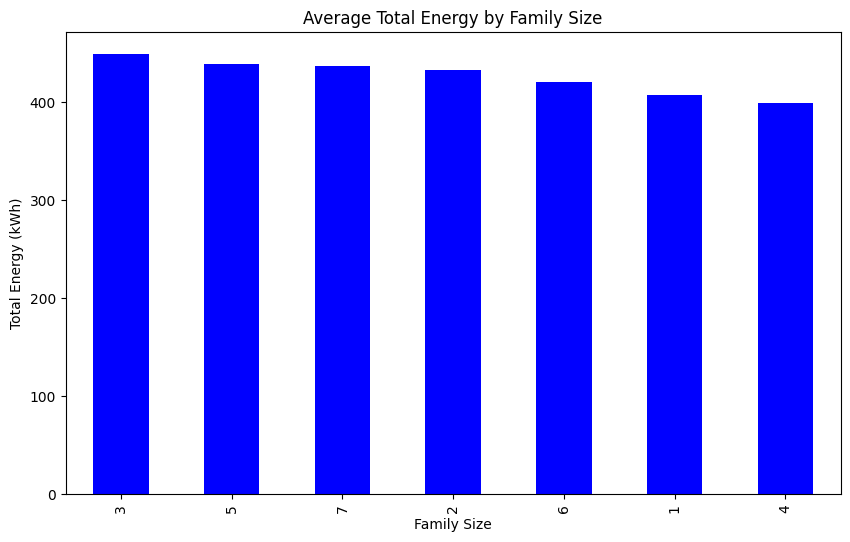

In [12]:
# Step 6: Visualize (plots shown inline in Colab)
plt.figure(figsize=(10, 6))
high_by_family.plot(kind='bar', color='blue')
plt.title('Average Total Energy by Family Size')
plt.ylabel('Total Energy (kWh)')
plt.xlabel('Family Size')
plt.show()  # Displays inline

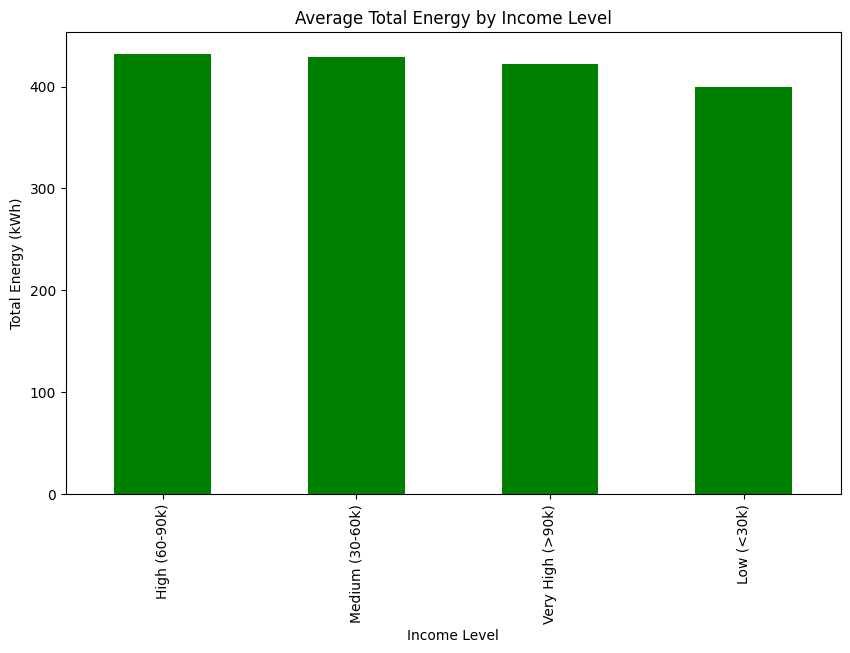

In [13]:
plt.figure(figsize=(10, 6))
high_by_income.plot(kind='bar', color='green')
plt.title('Average Total Energy by Income Level')
plt.ylabel('Total Energy (kWh)')
plt.xlabel('Income Level')
plt.show()

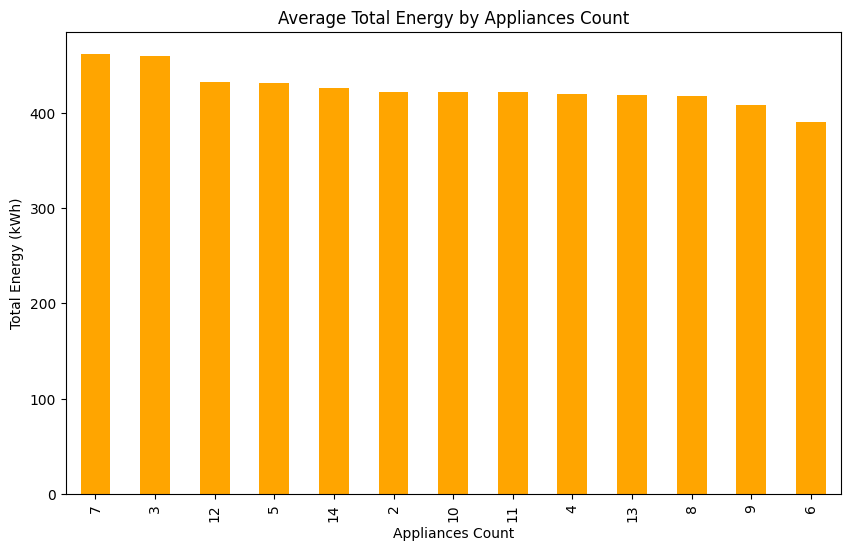

In [14]:
plt.figure(figsize=(10, 6))
high_by_appliances.plot(kind='bar', color='orange')
plt.title('Average Total Energy by Appliances Count')
plt.ylabel('Total Energy (kWh)')
plt.xlabel('Appliances Count')
plt.show()

In [15]:
# Save plots as PNG for Git (downloads in Colab)
plt.savefig('energy_by_family.png')
plt.savefig('energy_by_income.png')
plt.savefig('energy_by_appliances.png')

<Figure size 640x480 with 0 Axes>

In [16]:
# Step 7: Excel workbook (saves file; download from Colab files)
with pd.ExcelWriter('analysis.xlsx') as writer:
    df.to_excel(writer, sheet_name='Raw Data', index=False)
    monthly_avg.to_excel(writer, sheet_name='Monthly Averages')
    high_by_family.to_excel(writer, sheet_name='By Family Size')
    high_by_income.to_excel(writer, sheet_name='By Income')
    high_by_appliances.to_excel(writer, sheet_name='By Appliances')

In [17]:
# Summary (save as txt; download from Colab)
summary = f"""
Findings:
- Average electricity usage: {avg_electricity:.2f} kWh, gas: {avg_gas:.2f}, total: {avg_total:.2f}.
- Highest monthly usage in February ({monthly_avg['Total_Energy'].max():.2f} kWh), possibly due to heating.
- Weak correlations: Family size ({correlation_family:.2f}), Income ({correlation_income:.2f}), Appliances ({correlation_appliances:.2f}) – suggests other factors like location or habits dominate.
- Highest consumers: 3-member families ({high_by_family.max():.2f} kWh), high-income (60-90k: {high_by_income.max():.2f} kWh), 7-appliance households ({high_by_appliances.max():.2f} kWh).

Recommendations:
- For mid-sized families (3-5 members): Promote shared energy monitoring apps and efficient heating/cooling.
- For moderate-appliance households (7-12): Encourage unplugging unused devices and LED upgrades.
- General: Subsidies for insulation in high-usage months (Feb/Oct); audits for low-correlation groups to identify hidden inefficiencies.
"""
with open('summary.txt', 'w') as f:
    f.write(summary)

In [18]:
# Print confirmation
print("Analysis complete! Download 'analysis.xlsx', 'summary.txt', and PNGs from Colab files.")
print(summary)  # View summary inline

Analysis complete! Download 'analysis.xlsx', 'summary.txt', and PNGs from Colab files.

Findings:
- Average electricity usage: 301.34 kWh, gas: 123.26, total: 424.60.
- Highest monthly usage in February (474.92 kWh), possibly due to heating.
- Weak correlations: Family size (0.04), Income (0.02), Appliances (-0.01) – suggests other factors like location or habits dominate.
- Highest consumers: 3-member families (448.94 kWh), high-income (60-90k: 431.95 kWh), 7-appliance households (462.00 kWh).

Recommendations:
- For mid-sized families (3-5 members): Promote shared energy monitoring apps and efficient heating/cooling.
- For moderate-appliance households (7-12): Encourage unplugging unused devices and LED upgrades.
- General: Subsidies for insulation in high-usage months (Feb/Oct); audits for low-correlation groups to identify hidden inefficiencies.

